In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x=np.array([95,85,80,70,60])
y=np.array([85,95,70,65,70])

In [5]:
model = np.polyfit(x,y,1)
model

array([ 0.64383562, 26.78082192])

In [7]:
predict = np.poly1d(model)
predict(65)

68.63013698630135

In [8]:
y_pred = predict(x)
y_pred

array([87.94520548, 81.50684932, 78.28767123, 71.84931507, 65.4109589 ])

In [9]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.4803218090889323

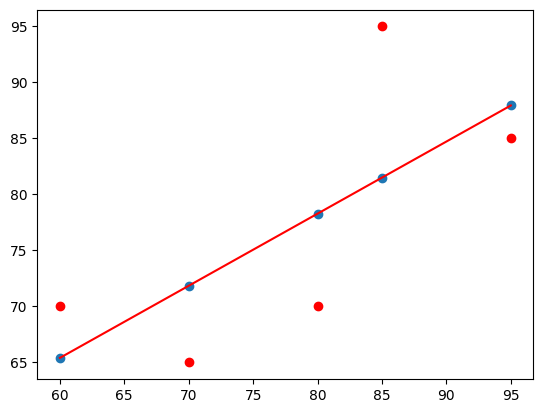

In [10]:
y_line = model[1] + model[0] * x
plt.plot(x,y_line,c='r')
plt.scatter(x,y_pred)
plt.scatter(x,y,c='r')

In [12]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

df = pd.DataFrame(housing.data)
df

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [14]:
df.columns = housing.feature_names
df.head()
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [15]:
df['PRICE'] = housing.target

In [16]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

In [17]:
x = df.drop(['PRICE'],axis=1)
y = df['PRICE']

In [18]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
import sklearn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()



In [20]:
model = lm.fit(x_train,y_train)

In [21]:
y_train_pred = lm.predict(x_train)
y_test_pred = lm.predict(x_test)

df = pd.DataFrame(y_train_pred,y_train)
df = pd.DataFrame(y_test_pred,y_test)

In [23]:
from sklearn.metrics import mean_squared_error,r2_score

mse = mean_squared_error(y_test,y_test_pred)

print(mse)

0.5289841670367214


In [26]:
mse = mean_squared_error(y_train_pred,y_train)
print(mse)

0.5234413607125448


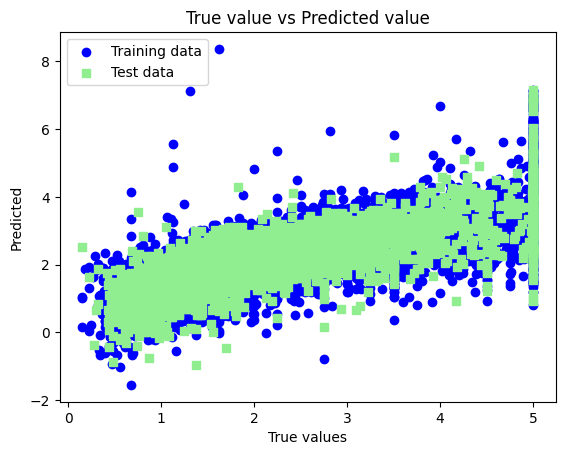

In [27]:
plt.scatter(y_train ,y_train_pred,c='blue',marker='o',label='Training data')
plt.scatter(y_test,y_test_pred ,c='lightgreen',marker='s',label='Test data')
plt.xlabel('True values')
plt.ylabel('Predicted')
plt.title("True value vs Predicted value")
plt.legend(loc= 'upper left')
#plt.hlines(y=0,xmin=0,xmax=50)
plt.plot()
plt.show()